<a href="https://colab.research.google.com/github/Kevin2558/Data_Science_Borrador/blob/main/10_Proyecto_Final/Opcion_4/Borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contextualización del problema**

El objetivo de este proyecto es aplicar Machine Learning en la busqueda de un modelo que ayude a un banco a anticiparse al riesgo de incumplimiento de un cliente, usando datos disponibles antes de hacerle entrega de un crédito.

Partiremos definiendo que es un "default" o incumplimiento:

En finanzas el término *default* se refiere al momento en que un cliente no paga su deuda según lo acordado. Por ejemplo, si una persona contrata un crédito de consumo separado con pagos mensuales y durante más de 90 días deja de pagar, esta persona será considerada en *default*.

Poder predecir cuando un cliente tiene una mayor probabilidad a considerarse default es importante para un banco debido a que cuando un banco otorga créditos (consumo, hipotecarios, tarjetas) asume un riesgo, es decir, se arriesga a la posibilidad de que el cliente no pague.

El no pago de un número considerable de clientes lleva al banco a perder dinero, reservar capital (por regulación) y perder reputación o hasta incluso quebrar. Buscamos evitar todas estas situaciones a través de evaluar si un cliente es apto o riesgoso para recibir un crédito.

Lo que nos pueden permitir los modelos no es solo decidir si darle un crédito o no a un cliente, sino que tambien definir los límites de crédito (cuanto prestar) y establecer tasas de interés personalizadas según el riesgo.

Partiremos con la carga del dataset a utilizar y la explicación de sus características.

# **Dataset**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.98M/0.98M [00:00<00:00, 17.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1


In [24]:
import pandas as pd

df = pd.read_csv(path+"/UCI_Credit_Card.csv")
print('Dimensiones del dataset:',df.shape)
df.head()

Dimensiones del dataset: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Este dataset contiene información de incumplimientos de pago, factores demográficos, información creditica, historial de pagos y estados de cuentas de 30.000 tarjetas de crédito en Taiwan, desde Abril de 2005 a Septiembre de 2005.

Contiene 25 variables, las cuales comprenden:

* **ID:** ID de cada cliente.
* **LIMIT_BAL:** Monton total del crédito otorgado en dólares NT (incluye crédito individual y familia/suplementario).
* **SEX:** Género (1 = masculino, 2 = femenino)
* **EDUCATION:** Nivel educativo (1 = posgrado, 2 = universidad, 3 = secundaria, 4 = otros, 5 = desconocido, 6 = desconocido)
* **MARRIAGE:** Estado civil (1 = casado, 2 = soltero, 3 = otros)
* **AGE:** Edad en años
* **PAY_0:** Estado de pago en septiembre de 2005 (-1 = pagó a tiempo, 1 = retraso de 1 mes, 2 = retraso de 2 meses, ..., 8 = retraso de 8 meses, 9 = retraso de 9 meses o más)
* **PAY_2:** Estado de pago en agosto de 2005
* **PAY_3:** Estado de pago en julio de 2005
* **PAY_4:** Estado de pago en junio de 2005
* **PAY_5:** Estado de pago en mayo de 2005
* **PAY_6:** Estado de pago en abril de 2005
* **BILL_AMT1:** Monto de la factura (estado de cuenta) en septiembre de 2005 (en dólares NT)
* **BILL_AMT2:** Monto de la factura en agosto de 2005
* **BILL_AMT3:** Monto de la factura en julio de 2005
* **BILL_AMT4:** Monto de la factura en junio de 2005
* **BILL_AMT5:** Monto de la factura en mayo de 2005
* **BILL_AMT6:** Monto de la factura en abril de 2005
* **PAY_AMT1:** Monto del pago realizado en septiembre de 2005 (en dólares NT).
* **PAY_AMT2:** Monto del pago realizado en agosto de 2005
* **PAY_AMT3:** Monto del pago realizado en julio de 2005
* **PAY_AMT4:** Monto del pago realizado en junio de 2005
* **PAY_AMT5:** Monto del pago realizado en mayo de 2005
* **PAY_AMT6:** Monto del pago realizado en abril de 2005
* **default.payment.next.month:** Indicador de incumplimiento de pago el mes siguiente (1 = si, 0 = no)

La información anterior nos ayuda a determinar la importancia de cada variable dentro del análisis y en la decisión de eliminar algunas de ellas.

Notemos que la variable ID no aporta información para el análisis de los datos por lo que procederemos a utilizar.

# **Librerías**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# **Análisis Exploratorio de Datos (EDA)**

Ahora procederemos al análisis de los datos de forma más intrínseca para ver como procesarlos antes de proceder con el entrenamiento.

In [21]:
df = df.drop(['ID'],axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Partamos viendo si el dataset presenta valores nulos. En el caso de tenerlos procederemos con el análisis de ellos para tomar una decisión sobre ellos.

In [13]:
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


Notemos que el dataset no contiene valores nulos, prosigamos.

Ahora sigamos con la visualización de las estadísticas descriptivas básicas del dataset para analizar las características de cada una de ellas.

In [14]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Notemos que las variables poseen diferentes dimensiones por lo que se procederá a escalarlas antes de realizar los modelos, para optimizar el proceso.

Ahora, procedamos a separar las variables numéricas de las categóricas, para realizar preprocesamientos separados.

Como se vió en la descripción del dataset, las variables LIMIT_BAL, BILL_AMT y PAY_AMT son variables numéricas y las variables SEX, EDUCATION, MARRIAGE y PAY son variables categóricas.

Por su parte default.payment.next.month es la variable objetivo.

Notemos que tenemos una variable AGE que indica la edad del cliente, podriamos tratarla como variables numérica pero lo que haremos será categorizarla entre rangos etarios definidos de la siguiente forma:

* Juventud (0): 21 - 26 años
* Adultez (1): 27 - 59 años
* Vejez (2): 60 años o más

In [25]:
num = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
cat = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

df['AGE'] = pd.cut(df['AGE'],bins=[20,26,59,100],labels=['Juventud','Adultez','Vejez'])
df['AGE'] = df['AGE'].cat.codes

df['AGE']

,AGE
0,0
1,0
2,1
3,1
4,1
...,...
29995,1
29996,1
29997,1
29998,1


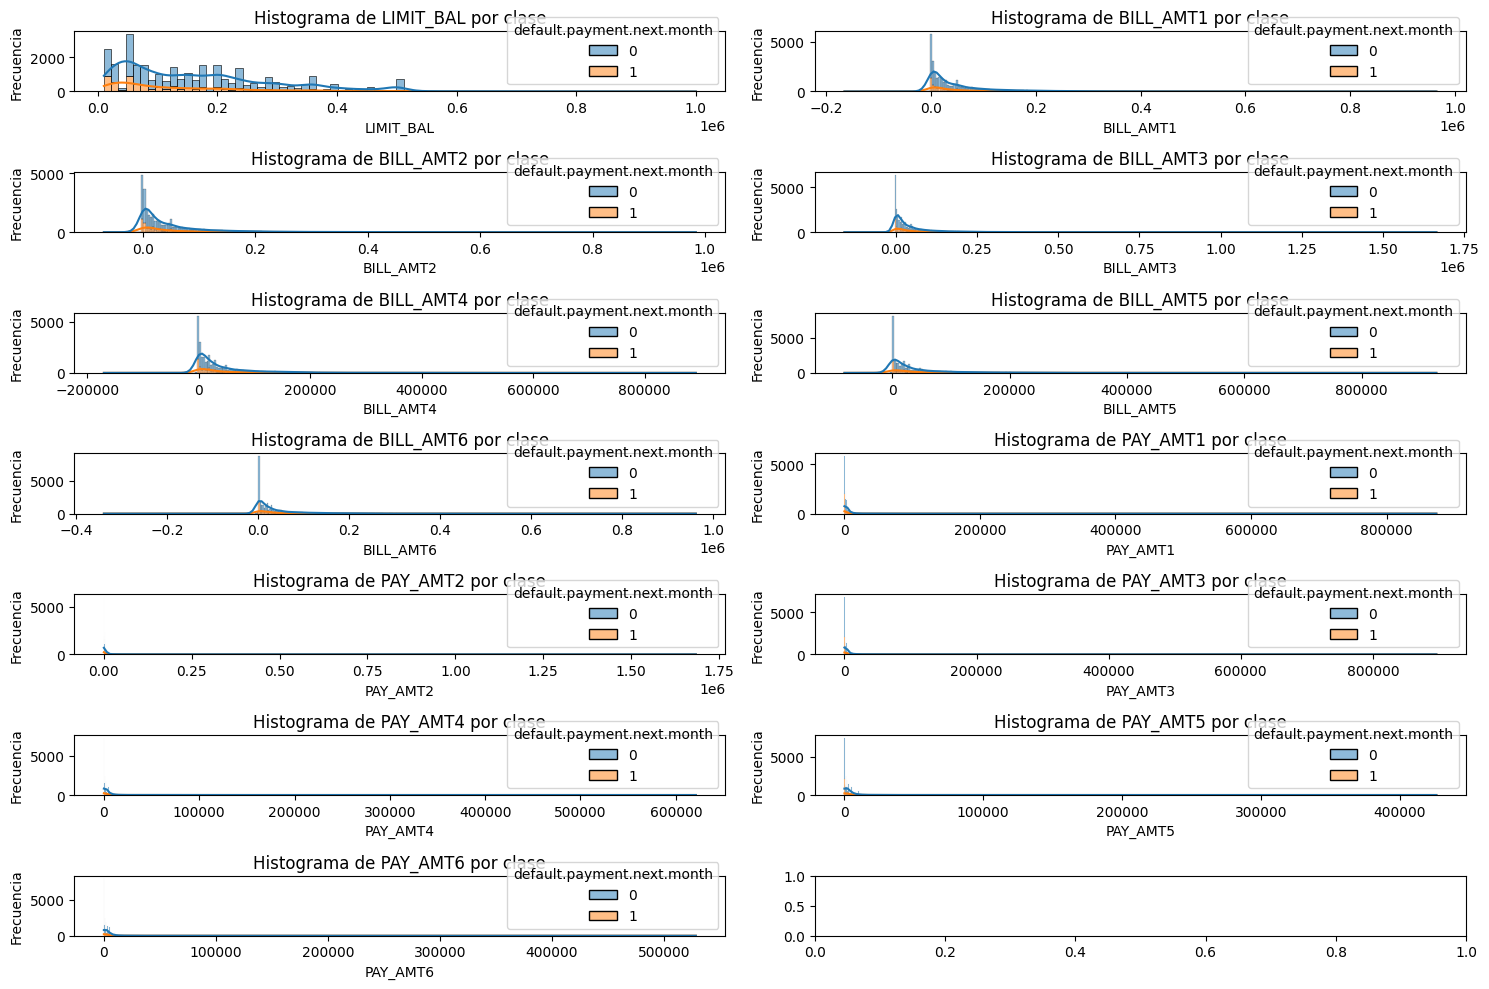

In [30]:
X = df.drop(['default.payment.next.month'],axis=1)
y = df['default.payment.next.month']

fig, axes = plt.subplots(7, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(X[num].columns):
    sns.histplot(data=df, x=feature, hue='default.payment.next.month', multiple='stack', kde=True, palette='tab10',ax=axes[i])
    axes[i].set_title(f'Histograma de {feature} por clase')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()